In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("/Users/marcobarbacci/ML PRACTICE Folder/Data/train.csv")

In [119]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

data_val= data[0: 1000].T
data_train = data[1000:m].T

yval = data_val[0]
xval = data_val[1:n]
xval = xval / 255

ytrain = data_train[0]
xtrain = data_train[1:n]
xtrain = xtrain / 255

print(ytrain)

[8 7 8 ... 9 4 2]


In [120]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [121]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return float(np.sum(predictions == Y) / Y.size)

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [122]:
W1, b1, W2, b2 = gradient_descent(xtrain, ytrain, 0.10, 800)

Iteration:  0
[9 3 9 ... 9 7 3] [8 7 8 ... 9 4 2]
0.1045609756097561
Iteration:  10
[9 7 2 ... 7 1 8] [8 7 8 ... 9 4 2]
0.1837560975609756
Iteration:  20
[9 7 6 ... 7 1 2] [8 7 8 ... 9 4 2]
0.291
Iteration:  30
[8 7 6 ... 7 1 2] [8 7 8 ... 9 4 2]
0.3819268292682927
Iteration:  40
[8 7 8 ... 7 1 2] [8 7 8 ... 9 4 2]
0.43121951219512195
Iteration:  50
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.4705853658536585
Iteration:  60
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.5093414634146342
Iteration:  70
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.5461463414634147
Iteration:  80
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.5796097560975609
Iteration:  90
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.6095121951219512
Iteration:  100
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.6352682926829268
Iteration:  110
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.6587560975609756
Iteration:  120
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.6761463414634147
Iteration:  130
[8 7 8 ... 7 4 2] [8 7 8 ... 9 4 2]
0.693390243902439
Iteration:  140
[8 7 8 ... 7 4

In [123]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = xtrain[:, index, None]
    prediction = make_predictions(xtrain[:, index, None], W1, b1, W2, b2)
    label = ytrain[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


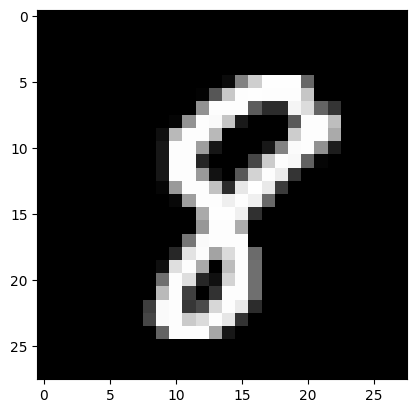

Prediction:  [7]
Label:  7


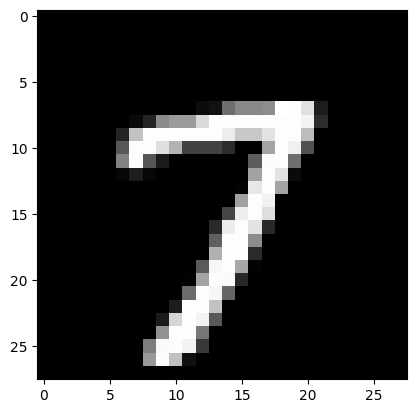

Prediction:  [8]
Label:  8


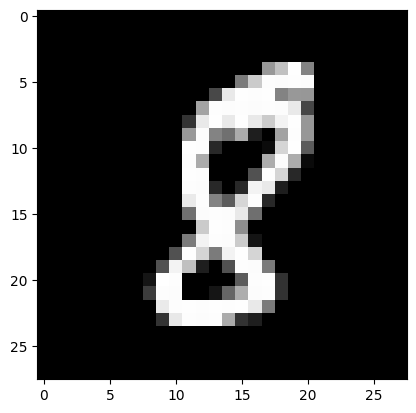

Prediction:  [7]
Label:  7


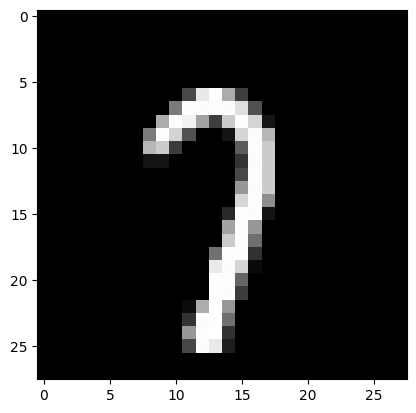

In [124]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

In [125]:
val_predictions = make_predictions(xval, W1, b1, W2, b2)
get_accuracy(val_predictions, yval)

[1 5 4 8 0 3 3 3 9 5 9 1 9 8 3 9 5 6 7 6 0 1 9 0 6 4 7 2 8 2 4 9 3 1 6 7 6
 4 9 1 2 6 1 7 8 9 1 0 1 9 2 9 1 8 1 4 1 1 5 3 2 1 5 9 0 3 6 3 1 1 7 5 2 1
 1 7 3 8 4 1 2 8 2 3 3 5 3 2 1 9 4 6 6 8 4 8 5 4 6 3 6 3 0 6 4 8 4 9 9 0 9
 0 6 3 3 4 9 9 4 8 8 1 4 9 8 2 8 0 7 4 3 0 2 6 8 7 9 3 1 1 6 4 3 1 4 9 0 4
 6 3 6 0 9 1 6 7 8 0 0 9 5 0 9 1 3 7 8 0 7 5 3 3 6 5 2 4 6 7 9 8 7 1 9 8 1
 1 5 3 6 4 7 3 2 0 9 5 4 7 4 1 6 5 3 0 5 4 0 4 3 3 6 4 1 7 6 7 3 4 1 2 6 4
 2 8 9 8 6 1 3 8 6 5 3 2 9 9 7 3 9 5 4 2 2 7 1 3 2 8 4 4 2 4 0 5 9 7 3 8 4
 7 6 9 1 1 8 1 1 4 1 0 1 0 0 6 0 7 3 4 3 8 6 2 7 2 8 7 7 9 5 2 4 4 1 7 7 8
 9 5 7 3 7 5 7 9 7 7 7 0 9 4 0 5 8 0 3 6 1 1 1 5 9 9 8 8 4 2 1 4 8 4 6 1 3
 6 0 2 6 9 8 4 7 5 4 5 0 9 4 1 3 4 1 9 9 7 3 6 1 0 5 7 9 3 3 8 0 9 0 6 8 1
 6 1 1 4 8 3 8 6 4 3 8 9 0 2 6 2 4 1 6 1 4 5 3 7 9 8 8 8 1 2 0 8 3 2 0 2 0
 9 7 5 3 6 8 9 1 5 3 9 2 9 4 7 2 6 1 2 9 7 9 4 5 4 2 0 6 4 8 6 5 1 8 4 7 3
 8 9 1 4 1 9 4 6 6 0 2 7 6 3 8 7 3 6 6 3 3 1 3 7 3 0 4 0 3 9 3 2 8 4 9 6 8
 2 3 8 0 0 4 7 7 1 1 9 8 

0.901